In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize, fsolve

Data to fit to:

In [82]:
Tsat = np.array([276.778, 251.3329, 221.4212, 187.5534, 149.2056])
rhol = np.array([428.5761,471.4212,514.2969,557.1258,600.0072])
rhov = np.array([43.59846,21.13519,7.967988,1.86442,0.143268])
Psat = np.array([23.62316,12.02041,4.435127,0.938118,0.058897])

In [83]:
def SSE(data,model):
    SE = (data - model)**2
    SSE = np.sum(SE)
    return SSE

In [84]:
logPsat = np.log10(Psat)
invTsat = 1000./Tsat

slope, intercept, r_value, p_value, std_err = stats.linregress(invTsat,logPsat)

logPsatHat = lambda invT: intercept + slope * invT
PsatHat = lambda T: 10.**(logPsatHat(1000./T))

In [85]:
def logPAntoine(b,T):
    logP = b[0] - b[1]/(b[2] + T)
    return logP

In [86]:
SSElogP = lambda b: SSE(logPsat,logPAntoine(b,Tsat))
guess = np.array([intercept,-slope*1000.,0.])
SSElogP(guess)

0.0017917937346864511

In [87]:
bopt = minimize(SSElogP,guess).x
bopt

array([   3.99319846,  671.72212285,  -20.58775973])

In [88]:
logPAntoine(bopt,Tsat)

array([ 1.37123237,  1.0820987 ,  0.64852577, -0.02991744, -1.22942168])

In [89]:
logPhat = lambda T: logPAntoine(bopt,T)
logPhat(Tsat)

array([ 1.37123237,  1.0820987 ,  0.64852577, -0.02991744, -1.22942168])

In [90]:
Tplot = np.linspace(min(Tsat),max(Tsat),1000)
invTplot = 1000./Tplot
logPsatplot = logPsatHat(invTplot)
logPAntoineplot = logPhat(Tplot)

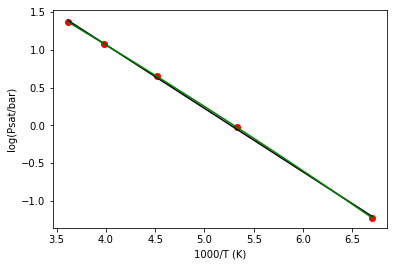

In [91]:
plt.plot(invTsat,logPsat,'ro')
plt.plot(invTplot,logPsatplot,'k')
plt.plot(invTplot,logPAntoineplot,'g')
plt.xlabel('1000/T (K)')
plt.ylabel('log(Psat/bar)')
plt.show()

In [92]:
def rholHat(b,T):
    beta = 0.326
    rhol = b[0] + b[1]*(b[2] - T) + b[3]*(b[2] - T)**beta
    return rhol

guess = np.array([200.,2,300.,50])

rholHat(guess,Tsat)

array([ 385.84095294,  474.75672961,  564.57231411,  658.01264871,
        758.11018966])

In [93]:
SSE(rhol,rholHat(guess,Tsat))

39539.747397399493

In [94]:
SSErhol = lambda b: SSE(rhol,rholHat(b,Tsat))

SSErhol(guess)

39539.747397399493

In [95]:
bopt = minimize(SSErhol,guess).x
bopt

array([  4.84379087e+01,   2.58462907e-01,   3.51463336e+02,
         8.84402753e+01])

In [96]:
SSErhol(bopt)

0.022934492991889113

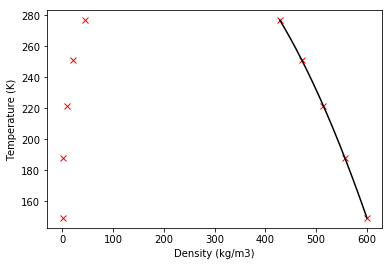

In [98]:
plt.plot(rhol,Tsat,'rx')
plt.plot(rhov,Tsat,'rx')
plt.plot(rholHat(bopt,Tplot),Tplot,'k')
plt.xlabel('Density (kg/m3)')
plt.ylabel('Temperature (K)')
plt.show()